# **MNIST Handwritten Digit Classification**

# **Importing Required Libraries**

In [ ]:
# Data Manipulation libraries
import numpy as np
import pandas as pd

# Deep Learning Libraries
import tensorflow
from tensorflow import keras

# Importing Sequential model
from tensorflow.keras import Sequential

# Importing Layers
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization, LeakyReLU

# Importing to_categorical from keras.utils to One-Hot-Encode the target variable
from tensorflow.keras.utils import to_categorical

# To check the accuracy of the model
from sklearn.metrics import accuracy_score

# **Loading the Data**

Tensorflow comes with pre loaded toy datasets like MNIST, Fashion-MNIST datasets, so we can directly load MNIST into our environment using the load_data() on mnist.

it comes in two sets of tuples for training and testing.

```python
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
```

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Checking the shape of the train and test set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [ ]:
# Getting an overview of the dataset
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
# getting the first image from train-set
single_image = X_train[0]

In [ ]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [ ]:
# First image from the test-set
X_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  84, 185, 159, 151,  60,  36,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 222, 254, 254, 254, 254, 241, 198,
        198, 198, 198, 198, 198, 198, 198, 170,  52,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  67, 114,  72, 114, 163, 227, 254,
        225, 254, 254, 254, 250, 229, 254, 254, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  17,  66,
         14,  67,  67,  67,  59,  21, 236, 254, 106,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  83, 253, 209,  18,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  22, 233, 255,  83,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 129, 254, 238,  44,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  59, 249, 254,  62,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 133, 254, 187,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   9, 205, 248,  58,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 126, 254, 182,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  75, 251, 240,  57,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         19, 221, 254, 166,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        203, 254, 219,  35,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,
        254, 254,  77,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 224,
        254, 115,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 254,
        254,  52,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

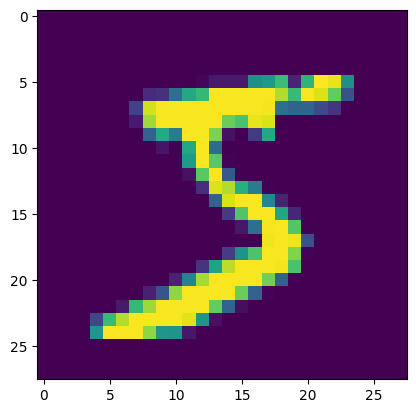

In [ ]:
# Showing image using matplotlib
import matplotlib.pyplot as plt
plt.imshow(single_image)

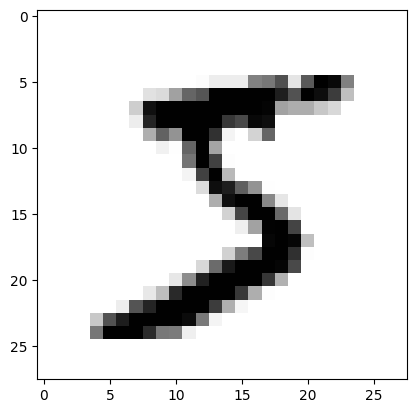

In [ ]:
# Changing the layout
plt.imshow(single_image, cmap='binary', )

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [ ]:
# Scaling the data to be passed into the model

X_train = X_train/255
X_test = X_test/255

In [ ]:
first_image = X_train[0]
first_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

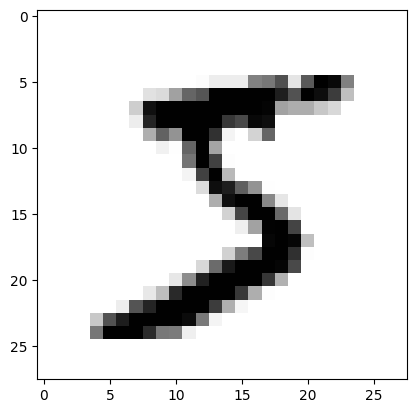

In [ ]:
plt.imshow(first_image, cmap='binary') # After scaling the image is still the same

In [ ]:
# One Hot Encoding the output

y_train_encoded = to_categorical(y_train, 10)
y_test_encoded = to_categorical(y_test, 10)

# **Building CNN model**

In [ ]:
# Reshaping the input into 3D

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

In [ ]:
# Instantiating the model
model = Sequential()

# Input Layer
model.add(Input(shape = (28, 28, 1)))

# Adding 1st Convolution Layer
model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D((2, 2)))

# Adding 2nd Convolution Layer
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))

# Dense layer
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))

# Output layer
model.add(Dense(10, activation = 'softmax'))

In [ ]:
# Getting the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 5, 5, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 158,858 (620.54 KB)

 Trainable params: 158,858 (620.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compiling the  model
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [ ]:
# Applying Early Stoppping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5)

In [ ]:
history = model.fit(X_train, y_train_encoded, validation_data = (X_test, y_test_encoded), epochs = 25, batch_size = 100, callbacks = [early_stopping])

Epoch 1/25
600/600 ━━━━━━━━━━━━━━━━━━━━ 108s 170ms/step - accuracy: 0.8650 - loss: 0.4536 - val_accuracy: 0.9853 - val_loss: 0.0467
Epoch 2/25
600/600 ━━━━━━━━━━━━━━━━━━━━ 129s 149ms/step - accuracy: 0.9856 - loss: 0.0482 - val_accuracy: 0.9878 - val_loss: 0.0334
Epoch 3/25
600/600 ━━━━━━━━━━━━━━━━━━━━ 132s 132ms/step - accuracy: 0.9903 - loss: 0.0319 - val_accuracy: 0.9867 - val_loss: 0.0418
Epoch 4/25
600/600 ━━━━━━━━━━━━━━━━━━━━ 99s 160ms/step - accuracy: 0.9917 - loss: 0.0273 - val_accuracy: 0.9893 - val_loss: 0.0309
Epoch 5/25
600/600 ━━━━━━━━━━━━━━━━━━━━ 163s 195ms/step - accuracy: 0.9934 - loss: 0.0197 - val_accuracy: 0.9920 - val_loss: 0.0240
Epoch 6/25
600/600 ━━━━━━━━━━━━━━━━━━━━ 128s 172ms/step - accuracy: 0.9944 - loss: 0.0158 - val_accuracy: 0.9921 - val_loss: 0.0249
Epoch 7/25
600/600 ━━━━━━━━━━━━━━━━━━━━ 109s 181ms/step - accuracy: 0.9953 - loss: 0.0148 - val_accuracy: 0.9909 - val_loss: 0.0319
Epoch 8/25
600/600 ━━━━━━━━━━━━━━━━━━━━ 130s 162ms/step - accuracy: 0.9963 - 

(0.0, 1.2)

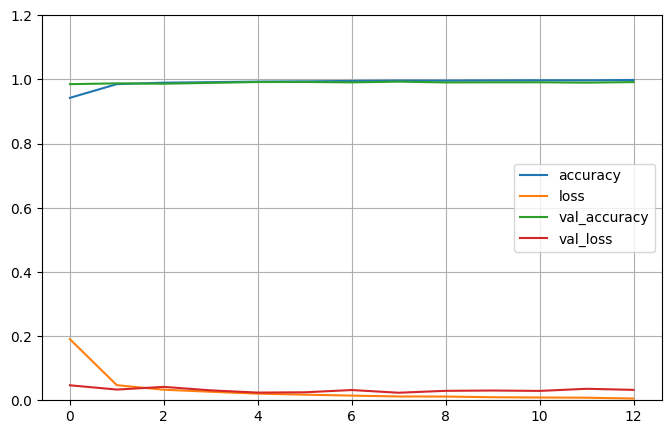

In [ ]:
# Ploting the training and validation accuracy and loss curves
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)

In [ ]:
# importing metrics to check the performance of the model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# passing the test set to model and storing probabilities
y_prob = model.predict(X_test)

# Predicting the class of each test set
y_pred = y_prob.argmax(axis=1)

accuracy_score(y_test, y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


0.9918

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      1.00      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      1.00      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
# Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
confusion_mat

array([[ 975,    0,    0,    0,    0,    0,    0,    1,    4,    0],
       [   1, 1126,    1,    3,    0,    1,    0,    0,    2,    1],
       [   1,    0, 1025,    0,    0,    0,    0,    3,    3,    0],
       [   0,    0,    1, 1004,    0,    4,    0,    0,    1,    0],
       [   0,    1,    1,    0,  969,    0,    3,    1,    1,    6],
       [   0,    0,    0,    2,    0,  889,    1,    0,    0,    0],
       [   3,    4,    0,    0,    0,    1,  945,    0,    5,    0],
       [   0,    2,    7,    0,    0,    0,    0, 1015,    1,    3],
       [   0,    0,    1,    0,    0,    0,    0,    0,  972,    1],
       [   0,    0,    0,    0,    4,    5,    0,    2,    0,  998]])

<Axes: >

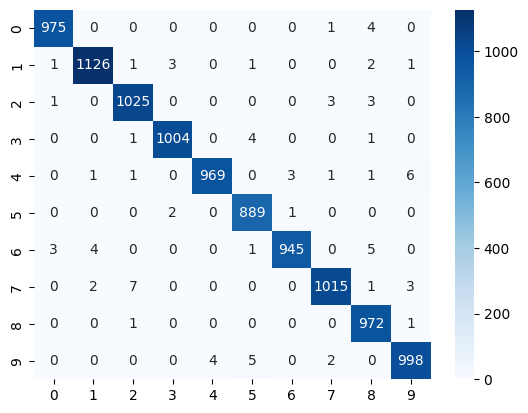

In [ ]:
# Creating an Heatmap of Confusion matrix
import seaborn as sns
sns.heatmap(confusion_mat, annot = True, cmap = 'Blues', fmt = 'd')

In [ ]:
# Saving the trained model
model.save('mnist_cnn_model.keras')

# **Testing the model**

In [ ]:
# Importing libraries
import cv2
from google.colab.patches import cv2_imshow

Enter the image path: /content/MNIST_digit7.png


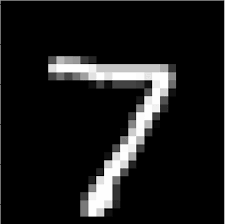

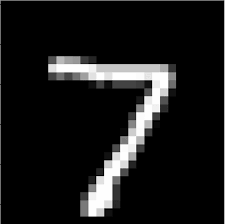

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
The predicted number is:  [7]


In [ ]:
# Getting the path of image
input_img_path = input("Enter the image path: ")

# Reading the image from the path
input_img = cv2.imread(input_img_path)

# Showing the original image
cv2_imshow(input_img)

# Converting fro BGR to Gray scale
grayscale_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
print()

# Showing the gray scale image
cv2_imshow(grayscale_img)

# Resizing the image into 28 x 28 size
resized_img = cv2.resize(grayscale_img, (28, 28))
print()

# Shwoing the resized image
cv2_imshow(resized_img)

# Passing the image to the model and getting the prediction
input_prediction = model.predict(resized_img.reshape(1, 28, 28, 1)).argmax(axis=1)

# Printing the model prediction
print("The predicted number is: ", input_prediction)

## **Testing**

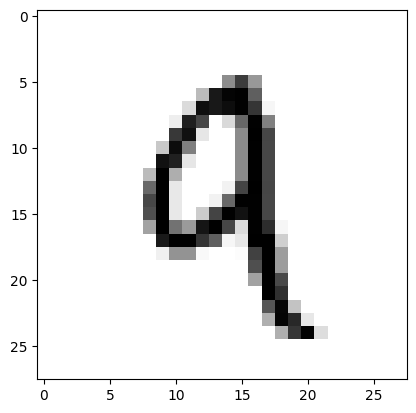

In [ ]:
plt.imshow(X_test[125], cmap = 'binary')

In [ ]:
model.predict(X_test[125].reshape(1, 28, 28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([9])

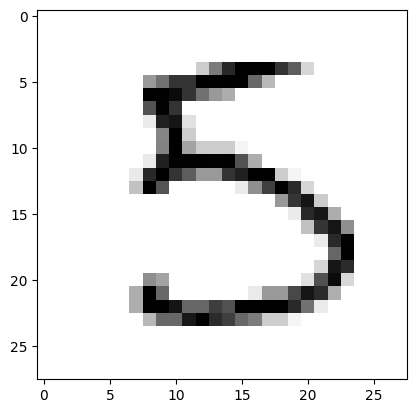

In [ ]:
plt.imshow(X_test[15], cmap = 'binary')


In [ ]:
model.predict(X_test[15].reshape(1, 28, 28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([5])

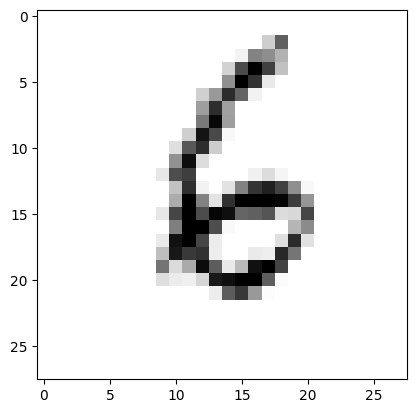

In [ ]:
plt.imshow(X_test[2000], cmap = 'binary')

In [ ]:
model.predict(X_test[2000].reshape(1, 28, 28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([6])

## **Building Complex Model with Functional API**

In [ ]:
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization, Dropout, LeakyReLU

In [ ]:
input = Input(shape=(28, 28))

# Flatten the Input
flatten = Flatten()(input)

# First Branch
b1 = Dense(512, kernel_initializer='he_normal', activation = LeakyReLU(alpha = 0.01))(flatten)

b1 = BatchNormalization()(b1)
b1 = Dropout(0.3)(b1)

# Second Branch
b2 = Dense(512, kernel_initializer='he_normal', activation = LeakyReLU(alpha = 0.01))(flatten)
b2 = BatchNormalization()(b2)
b2 = Dropout(0.3)(b2)

# Merging both branches
merged = Concatenate()([b1, b2])

# Adding More layers
x = Dense(128, kernel_initializer = 'he_normal', activation = LeakyReLU(alpha = 0.01))(merged)
x = BatchNormalization()(x)

# Output layer
output = Dense(10, activation = 'softmax')(x)

model3 = Model(inputs = input, outputs = output)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
model3.summary()

Model: "functional_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 28, 28)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_3 (Flatten)       │ (None, 784)            │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 512)            │        401,920 │ flatten_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 512)            │        401,920 │ flatten_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 512)            │          2,048 │ dense_8[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 512)            │          2,048 │ dense_9[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 512)            │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 512)            │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 1024)           │              0 │ dropout[0][0],         │
│                           │                        │                │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 128)            │        131,200 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 128)            │            512 │ dense_10[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 10)             │          1,290 │ batch_normalization_2… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 940,938 (3.59 MB)

 Trainable params: 938,634 (3.58 MB)

 Non-trainable params: 2,304 (9.00 KB)

In [ ]:
model3.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
history3 = model3.fit(X_train, y_train_encoded, validation_data = (X_test, y_test_encoded), epochs = 15, batch_size = 32)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 16ms/step - accuracy: 0.8877 - loss: 0.3574 - val_accuracy: 0.9557 - val_loss: 0.1401
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9498 - loss: 0.1646 - val_accuracy: 0.9666 - val_loss: 0.1070
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9586 - loss: 0.1315 - val_accuracy: 0.9732 - val_loss: 0.0867
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9635 - loss: 0.1195 - val_accuracy: 0.9714 - val_loss: 0.0909
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9654 - loss: 0.1093 - val_accuracy: 0.9715 - val_loss: 0.0881
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9686 - loss: 0.0960 - val_accuracy: 0.9740 - val_loss: 0.0797
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9693 - loss: 0.0966 - val_accuracy: 0.9756 - val_loss: 0.0789
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9708 -

(0.0, 1.0)

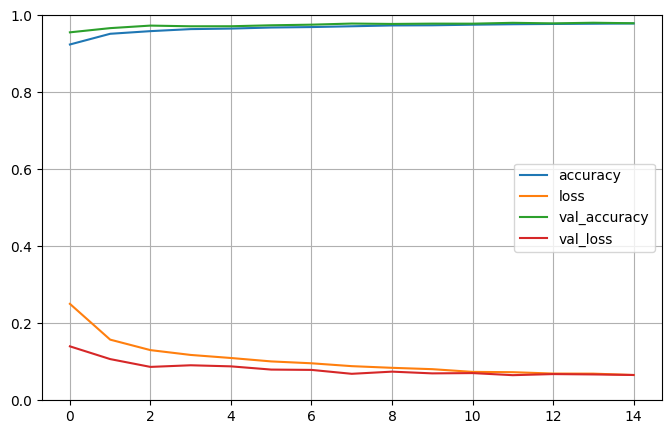

In [ ]:
pd.DataFrame(history3.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

In [ ]:
y_prob = model3.predict(X_test)
y_pred = y_prob.argmax(axis=1)

accuracy_score(y_test, y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


0.9793